# Contrast adaption

In [9]:
image = cv2.imread(str(image_file), cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image], [0], None, [256], [0,256])
hist /= np.sum(hist)
cum_hist = np.cumsum(hist)

percentile_5 = np.argmin(np.abs(cum_hist-0.05))
percentile_95 = np.argmin(np.abs(cum_hist-0.90))

a = 255/(percentile_95-percentile_5)
b = -a*percentile_5
image_adapted = np.clip(a*image+b, 0, 255).astype(np.uint8)

ada_hist = cv2.calcHist([image_adapted], [0], None, [256], [0,256])
ada_hist /= np.sum(ada_hist)
ada_cum_hist = np.cumsum(ada_hist)

Text(0.5,1,'Adapted cumulative histogram')

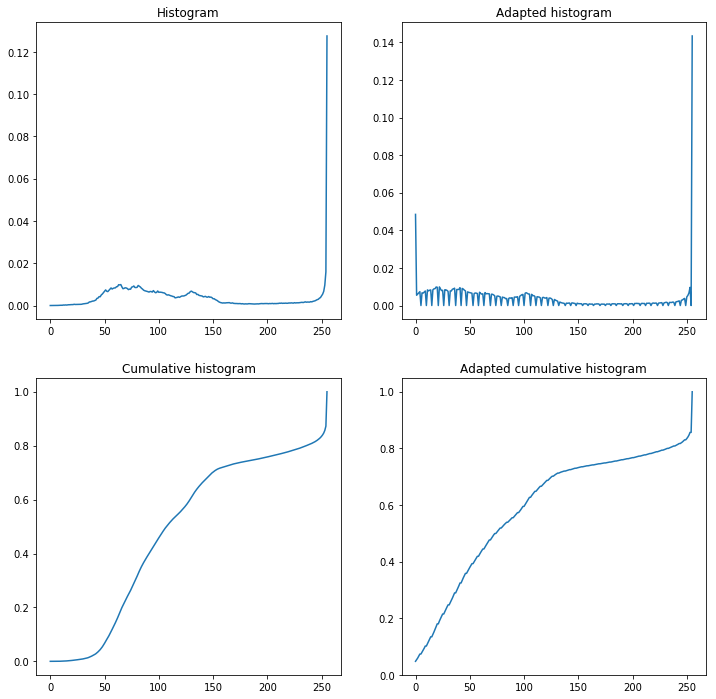

In [10]:
fig, ax = plt.subplots(2,2,figsize=(12, 12))

ax[0,0].plot(hist)
ax[0,0].set_title('Histogram')
ax[1,0].plot(cum_hist)
ax[1,0].set_title('Cumulative histogram')
ax[0,1].plot(ada_hist)
ax[0,1].set_title('Adapted histogram')
ax[1,1].plot(ada_cum_hist)
ax[1,1].set_title('Adapted cumulative histogram')

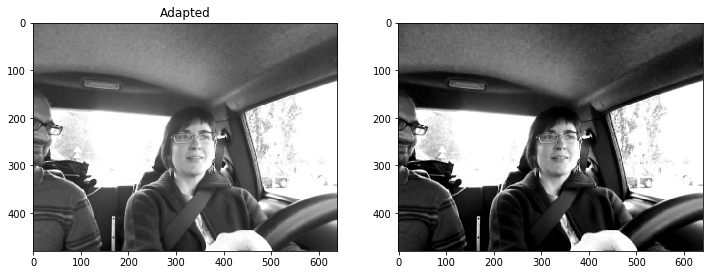

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12, 12))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(image_adapted, cmap='gray')
ax[0].set_title('Adapted')
plt.show()